In [ ]:
import os
#import library yang dibutuhkan dalam pengolahan citra
import pandas
import numpy 
import cv2 as opcv
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as pyplot

#import library yang dibutuhkan dalam evaluasi klasifikasi
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

#import library yang dibutuhkan dalam algoritma klasifikasi
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#fungsi untuk preprocessing citra
def praproses(x):
    #aplikasi gaussian blur untukn smoothing citra dengan filter 3x3
    gaussian = opcv.GaussianBlur(x, (3, 3), 0)
    #return hasil citra
    return gaussian

def img_lbp_hos(source):
    # proses ekstrasi ciri menggunakan lbp
    lbp_array = local_binary_pattern(source, n_points, radius, METHOD)
    lbp_array, bins = numpy.histogram(lbp_array.ravel(), 256, [0,256])
    lbp_array = numpy.transpose(lbp_array[0:18, numpy.newaxis])
    
    # lbp_his = lbp_array.flatten()
    lbp_his = (lbp_array.flatten())

    return lbp_his

    

In [ ]:
#inisialisasi local binary pattern
radius = 3
n_points = 8 * radius
METHOD = 'uniform'
pyplot.rcParams['font.size'] = 9

path = "D:\\Download\\Compressed\\dataset_bola\\dataset_bola\\"

In [ ]:
dataset = []
response = []

j=0
for folder in os.listdir(path):
    # memnabaca setiap yang ada dalam 
    print(folder)
    for filename in os.listdir(path+folder):
        img = opcv.imread(path+folder+"\\"+filename,0)

        pre_img = praproses(img)
        his_img = img_lbp_hos(pre_img)
        his_img = his_img/255.0

        dataset.append(his_img)
        response.append(j)
    j+=1

# print(numpy.shape(dataset))
# print(numpy.shape(response))
        

Billiard
Soccer
Tenis


In [ ]:
# hasil= []
# for i in range(100):
#     train_list, test_list, train_res, test_res = train_test_split(dataset, response, test_size=0.2, random_state=i)
    
#     rforest = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
#     rforest.fit(train_list, train_res)
#     rforest_predict = rforest.predict(test_list)

#     rforest_acc = accuracy_score(test_res, rforest_predict)
#     # print(rforest_acc*100)
#     hasil.append(rforest_acc)

# # hasil = numpy.array(hasil).astype(numpy.float32)
# print(max(hasil), hasil.index(max(hasil)))


In [ ]:
train_list, test_list, train_res, test_res = train_test_split(dataset, response, test_size=0.2, random_state=74)

In [ ]:
print(numpy.shape(train_list), numpy.shape(train_res))
print(numpy.shape(test_list), numpy.shape(test_res))

(120, 18) (120,)
(30, 18) (30,)


In [ ]:
hasil = []
for i in range(100):
    rforest = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=i)
    rforest.fit(train_list, train_res)
    rforest_predict = rforest.predict(test_list)

    rforest_acc = accuracy_score(test_res, rforest_predict)
    hasil.append(rforest_acc*100)

df = pandas.DataFrame(hasil)
df.to_csv("rf_lbp.csv")
# print(max(hasil), hasil.index(max(hasil)))



In [ ]:
rforest = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=8)
model_x = rforest.fit(train_list, train_res)
rforest_predict = rforest.predict(test_list)

rforest_acc = accuracy_score(test_res, rforest_predict)
print(rforest_acc*100)
# print(test_res)
# print(rforest_predict)

86.66666666666667


In [ ]:
print('------------------------ confusion matrix  ------------------------------')
cf_matrix =confusion_matrix(test_res, rforest_predict)
print(cf_matrix)
print('--------------------- classification report  ----------------------------')
print(classification_report(test_res, rforest_predict))

------------------------ confusion matrix  ------------------------------
[[8 1 1]
 [0 9 2]
 [0 0 9]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.90      0.82      0.86        11
           2       0.75      1.00      0.86         9

    accuracy                           0.87        30
   macro avg       0.88      0.87      0.87        30
weighted avg       0.89      0.87      0.87        30



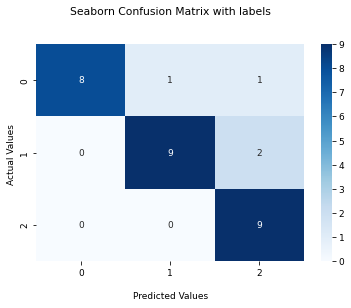

In [ ]:
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2])
ax.yaxis.set_ticklabels([0,1,2])

## Display the visualization of the Confusion Matrix.
pyplot.show()

Confusion matrix dari hasil klasifikasi KNN sebagai berikut : 
[[8 1 1]
 [0 9 2]
 [0 0 9]]
Visualisasi confusion matrix dari hasil klasifikasi KNN sebagai berikut : 


c:\Users\V3Te\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


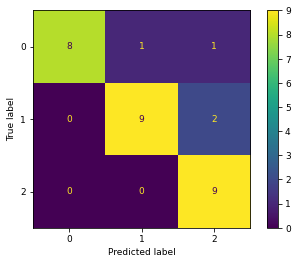

In [ ]:
# visualisasi confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
#cetak confusion_matrix yaitu matriks yang berisi ringkasan prediksi
print("Confusion matrix dari hasil klasifikasi KNN sebagai berikut : ")
print(confusion_matrix(test_res, rforest_predict))

#visualisasi confusion matrix
plot_confusion_matrix(rforest, test_list, test_res)
print("Visualisasi confusion matrix dari hasil klasifikasi KNN sebagai berikut : ")
pyplot.show()